# Lab Segmentation 1

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

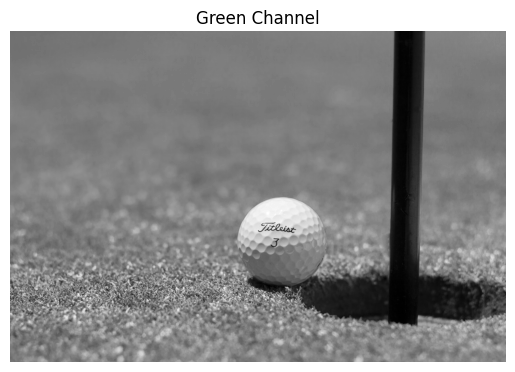

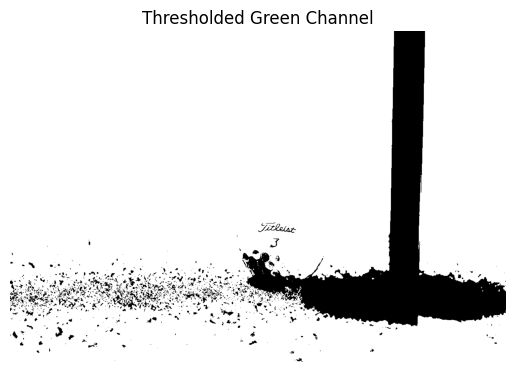

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


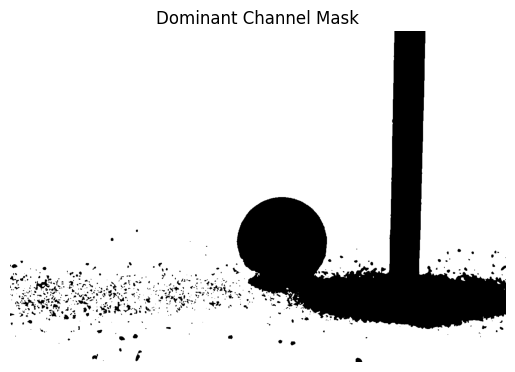

In [2]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf
img = io.imread('imgs/exp1/golf.jpeg')
img = img.astype(float)

# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
r_channel = img[:,:,0]
g_channel = img[:,:,1]
b_channel = img[:,:,2]

# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
# GREEN
# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
plt.imshow(g_channel, cmap="gray")
plt.title("Green Channel")
plt.axis("off")
plt.show()

thresholded_image = (g_channel >= 100).astype(np.uint8) * 255

plt.imshow(thresholded_image, cmap="gray")
plt.title("Thresholded Green Channel")
plt.axis("off")
plt.show()

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold
threshold = 25
g_dominant_mask = (g_channel > r_channel + threshold) & (g_channel > b_channel + threshold)
binarized_image = g_dominant_mask.astype(np.uint8) * 255

# Display the mask
print(g_dominant_mask)

# 6- display the binarized image
plt.imshow(binarized_image, cmap="gray")
plt.title("Dominant Channel Mask")
plt.axis("off")
plt.show()

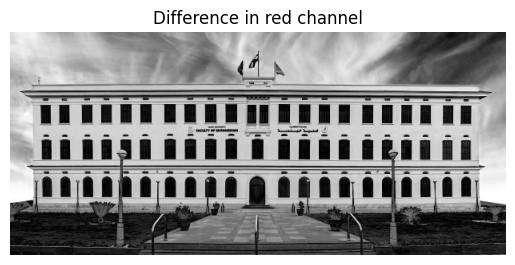

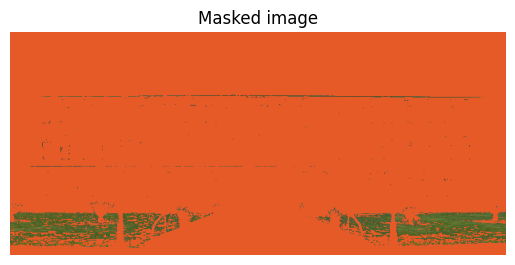

In [3]:
# 1- Get the required RGB color (Using a color picker)
# (91, 112, 45)

# 2- Read image
img = io.imread('imgs/exp2/cufe.png')
img = img.astype(float)

# 3- extract R, G and B channels (as float)
r_channel = img[:,:,0]
g_channel = img[:,:,1]
b_channel = img[:,:,2]

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
d_r_channel = abs(r_channel - 91)
d_g_channel = abs(g_channel - 112)
d_b_channel = abs(b_channel - 45)

plt.imshow(d_r_channel, cmap="gray")
plt.title("Difference in red channel")
plt.axis("off")
plt.show()

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
overall_distance = d_r_channel + d_g_channel + d_b_channel

# 6-  create a mask by thresholding the differences
mask = (overall_distance > 50)

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40
img[mask] = np.array([230, 90, 40])
img = img.astype(int)

# 8- show the image or save it
plt.imshow(img)
plt.title("Masked image")
plt.axis("off")
plt.show()